In [14]:
# cleaning
# for handling data and numerical operation
import numpy as np
import pandas as pd

# to evaluate model performance
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

# for plotting used for confusion matrix
import matplotlib.pyplot as plt

# to split the data into training, validation, testing
from sklearn.model_selection import train_test_split

# load the data set where columns are separated by ;
dataset = pd.read_csv('/content/sample_data/student-mat.csv', delimiter=';')


print(dataset.isnull().sum())  # Shows how many missing values in each column

# Drop rows with missing values (optional, none expected here)
dataset.dropna(inplace=True)

print(f"Number of duplicated rows: {dataset.duplicated().sum()}")#drop any dublicated rows
dataset.drop_duplicates(inplace=True)

print(dataset.dtypes) # Displays the data types of each column

print(dataset.describe()) # Provides statistical summary of the dataset including count, mean, std, min, max

# Detects and lists columns with only one unique value
constant_columns = [col for col in dataset.columns if dataset[col].nunique() == 1]
print("Columns with no variation:", constant_columns)

################# Finished checking the data #############

# select all categorical columns and convert them to numerical
categorical_features = dataset.select_dtypes(['object']).columns
dataset[categorical_features] = dataset[categorical_features].apply(lambda x: pd.factorize(x)[0])

# Convert G3 values into categories for classification
dataset['FinalGrade'] = pd.cut(dataset['G3'],
                                bins=[-1, 5, 9, 13, 16, 20],
                                labels=[0, 1, 2, 3, 4]  # F, D, C, B, A
                               ).astype(int)

# Remove G3 column (it's already converted)
dataset.drop(columns=['G3'], inplace=True)

# Separate features and target
X = dataset.drop('FinalGrade', axis=1)
y = dataset['FinalGrade']

# Split (80% train+val, 20% test)
X_train_val, X_test, Y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Split X_train_val into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, Y_train_val, test_size=0.25, stratify=Y_train_val, random_state=42)

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64
Number of duplicated rows: 0
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher    

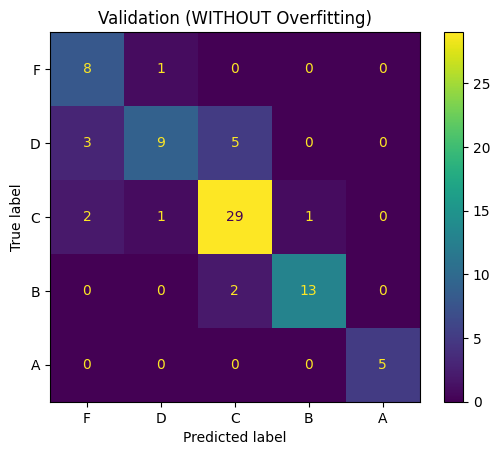

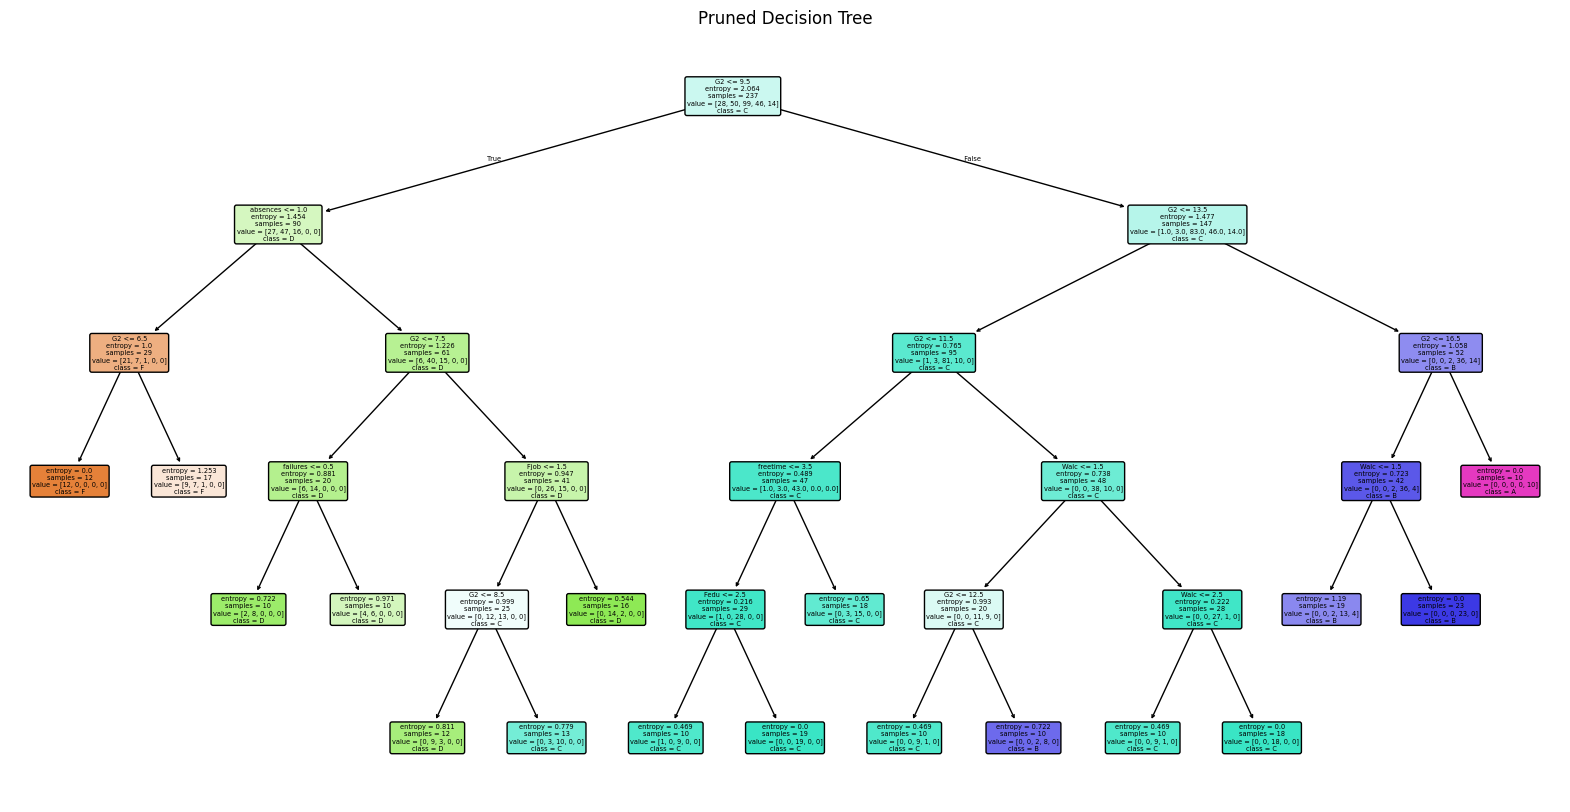


Pruned Model on Testset
Test Confusion Matrix:
 [[ 7  1  1  0  0]
 [ 1 14  2  0  0]
 [ 0  2 29  2  0]
 [ 0  0  1 14  0]
 [ 0  0  0  0  5]]

Test Accuracy: 87.34 %

Classification Report:
               precision    recall  f1-score   support

           F       0.88      0.78      0.82         9
           D       0.82      0.82      0.82        17
           C       0.88      0.88      0.88        33
           B       0.88      0.93      0.90        15
           A       1.00      1.00      1.00         5

    accuracy                           0.87        79
   macro avg       0.89      0.88      0.89        79
weighted avg       0.87      0.87      0.87        79



In [15]:
#DT

# to build the decision tree model , to visualize tree
from sklearn.tree import DecisionTreeClassifier, plot_tree



# Train WITH overfitting control (pruned)
model_pruned = DecisionTreeClassifier(criterion='entropy',max_depth=7, min_samples_leaf=10, random_state=42)

model_pruned.fit(X_train, y_train)  # Train the pruned model

# Predict on validation set
val_pred_pruned = model_pruned.predict(X_val)
matrix2 = confusion_matrix(y_val, val_pred_pruned)
ConfusionMatrixDisplay(matrix2, display_labels=['F', 'D', 'C', 'B', 'A']).plot()
plt.title("Validation (WITHOUT Overfitting)")
plt.show()

# Visualize pruned tree
plt.figure(figsize=(20, 10))
plot_tree(model_pruned, feature_names=X.columns, class_names=['F', 'D', 'C', 'B', 'A'], filled=True, rounded=True)
plt.title("Pruned Decision Tree")
plt.show()

# Evaluate pruned model on test set
test_preds_pruned = model_pruned.predict(X_test)
cm_test_pruned = confusion_matrix(y_test, test_preds_pruned)
acc_test_pruned = accuracy_score(y_test, test_preds_pruned)
report_test_pruned = classification_report(y_test, test_preds_pruned, target_names=['F', 'D', 'C', 'B', 'A'])

print("\nPruned Model on Testset")
print("Test Confusion Matrix:\n", cm_test_pruned)
print("\nTest Accuracy:", round(acc_test_pruned * 100, 2), "%")
print("\nClassification Report:\n", report_test_pruned)


Best K value selected: 13


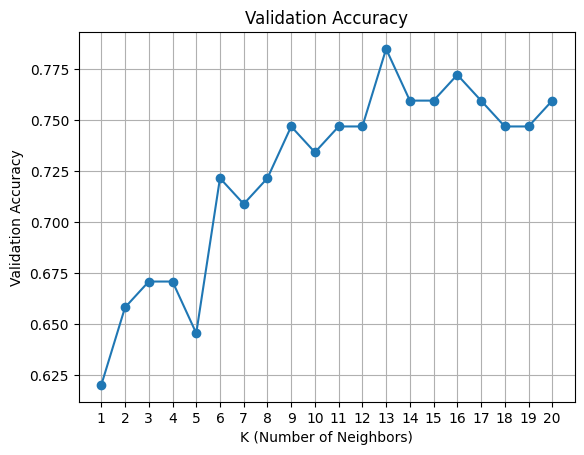

Confusion Matrix:
 [[ 6  2  1  0  0]
 [ 0 11  6  0  0]
 [ 2  1 29  1  0]
 [ 0  0  1 14  0]
 [ 0  0  0  2  3]]
Accuracy: 79.74683544303798
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.79      0.65      0.71        17
           2       0.78      0.88      0.83        33
           3       0.82      0.93      0.88        15
           4       1.00      0.60      0.75         5

    accuracy                           0.80        79
   macro avg       0.83      0.75      0.77        79
weighted avg       0.80      0.80      0.79        79



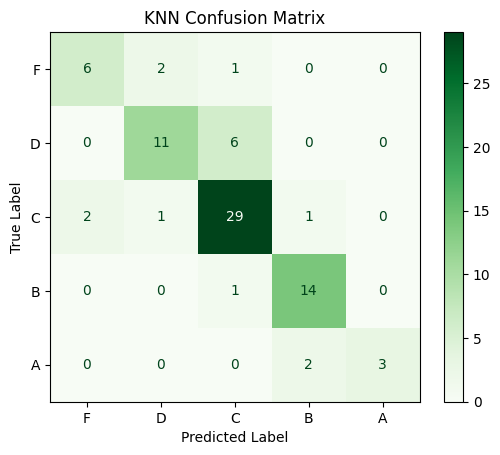

In [16]:
#KNN

# to build the KNN model
from sklearn.neighbors import KNeighborsClassifier



# 	Finding the best k:
k_range = range(1, 21) #k values from 1 to 20
accuracies = [] #list to store all k accurecy
for k in k_range:#: by going through a loop over a range from 1 to 20 for each k
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)#for each k, a model is trained using training data
    val_pred = model.predict(X_val)#for each k, performance evaluated on the validation data
    acc = accuracy_score(y_val, val_pred)#compute the accuracy for each k
    accuracies.append(acc)#the accuracy for each k is stored in a list

# Get the best K value
best_k = k_range[accuracies.index(max(accuracies))]
print(f"Best K value selected: {best_k}")

# Plot validation accuracy vs k
plt.figure()
plt.plot(k_range, accuracies, marker='o')
plt.title("Validation Accuracy")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Validation Accuracy")
plt.xticks(k_range)
plt.grid(True)
plt.show()


#initialize knn model with the best k neighbors +equal weight to all neighbors
knn = KNeighborsClassifier(n_neighbors=best_k)
#build the model using train+val data
knn.fit(X_train_val, Y_train_val)
#make prediction on test data
y_pred_knn = knn.predict(X_test)

#generate confusion matrix
KNNmatrix = confusion_matrix(y_test, y_pred_knn)
#calculate accuracy
accuracy = accuracy_score(y_test, y_pred_knn)
#generate classification report
report = classification_report(y_test, y_pred_knn)

# print confusion matrix
print("Confusion Matrix:\n", KNNmatrix)
print("Accuracy:", accuracy*100)# Display accuracy as persentage
#print classification report
print("Classification Report:\n", report)

# Plot the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=KNNmatrix, display_labels=['F', 'D', 'C', 'B', 'A'])
disp.plot(cmap='Greens', values_format='d')  #  blues color and display values as int

# Customize the plot title,labels
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Confusion Matrix:
 [[ 6  2  1  0  0]
 [ 5 10  2  0  0]
 [ 0  3 28  2  0]
 [ 0  0  2 11  2]
 [ 0  0  0  0  5]]
Accuracy: 75.9493670886076
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.67      0.60         9
           1       0.67      0.59      0.62        17
           2       0.85      0.85      0.85        33
           3       0.85      0.73      0.79        15
           4       0.71      1.00      0.83         5

    accuracy                           0.76        79
   macro avg       0.72      0.77      0.74        79
weighted avg       0.77      0.76      0.76        79



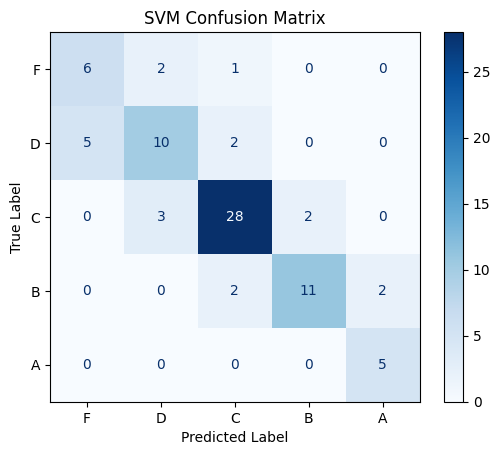

In [17]:
# to build the SVM model
from sklearn.svm import SVC

# initialize SVM model with linear kernel
svm = SVC(kernel='linear')

# build the model using train+val data
svm.fit(X_train_val, Y_train_val)

# make prediction on test data
y_pred_svm = svm.predict(X_test)

# generate confusion matrix
SVMmatrix = confusion_matrix(y_test, y_pred_svm)
# calculate accuracy
accuracy = accuracy_score(y_test, y_pred_svm)
# generate classification report
report = classification_report(y_test, y_pred_svm)

# print confusion matrix
print("Confusion Matrix:\n", SVMmatrix)
print("Accuracy:", accuracy * 100)  # Display accuracy as percentage
#print classification report
print("Classification Report:\n", report)

# Plot the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=SVMmatrix, display_labels=['F', 'D', 'C', 'B', 'A'])
disp.plot(cmap='Blues', values_format='d')  # use blues color and display values as int

# Customize the plot title,labels
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
